In [9]:
# Imports
import sys
import os
import pickle
import numpy as np
import time
from mpi4py import MPI
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.Material import unitDensityMaterial
from electronTransportCode.MCEstimator import TrackEndEstimator
from electronTransportCode.ParticleModel import KDRTestParticle
from electronTransportCode.SimOptions import PointSource
from electronTransportCode.MCParticleTracer import KDR, AnalogParticleTracer
%matplotlib widget

In [10]:
trackEndEstimatorkx, trackEndEstimatorky, trackEndEstimatorkz = pickle.load(open('data/trackEndEstimatork.pkl', 'rb'))
trackEndEstimatorkdrx, trackEndEstimatorkdry, trackEndEstimatorkdrz = pickle.load(open('data/trackEndEstimatorkdr.pkl', 'rb'))

eSource, NB_PARTICLES = pickle.load(open('data/simargv.pkl', 'rb'))
kineticParticleTracer = pickle.load(open('data/particleTracerK.pkl', 'rb'))
kdr = pickle.load(open('data/kdr.pkl', 'rb'))
print(eSource, NB_PARTICLES)

5.0 2000000


/tmp/ipykernel_12765/985423237.py:6: DeprecationWarning: Please use `RegularGridInterpolator` from the `scipy.interpolate` namespace, the `scipy.interpolate.interpolate` namespace is deprecated.
  kdr = pickle.load(open('data/kdr.pkl', 'rb'))


Text(0.5, 0, 'z')

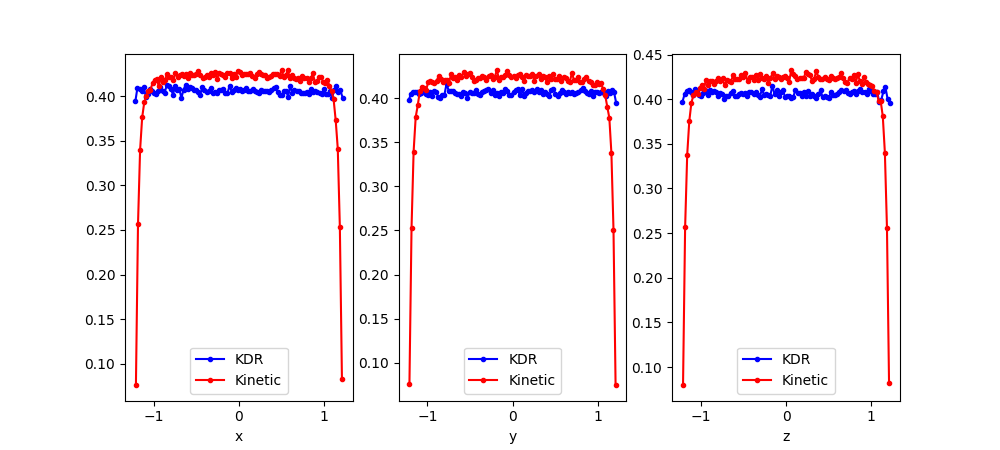

In [11]:
binCenterkx, binValkx = trackEndEstimatorkx.getDensityData()
binCenterkdrx, binValkdrx = trackEndEstimatorkdrx.getDensityData()
binCenterky, binValky = trackEndEstimatorky.getDensityData()
binCenterkdry, binValkdry = trackEndEstimatorkdry.getDensityData()
binCenterkz, binValkz = trackEndEstimatorkz.getDensityData()
binCenterkdrz, binValkdrz = trackEndEstimatorkdrz.getDensityData()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4.5))
ax1.plot(binCenterkdrx, binValkdrx, '.-b', label='KDR')
ax1.plot(binCenterkx, binValkx, '.-r', label='Kinetic')
ax1.legend()
ax1.set_xlabel('x')

ax2.plot(binCenterkdry, binValkdry, '.-b', label='KDR')
ax2.plot(binCenterky, binValky, '.-r', label='Kinetic')
ax2.legend()
ax2.set_xlabel('y')

ax3.plot(binCenterkdrz, binValkdrz, '.-b', label='KDR')
ax3.plot(binCenterkz, binValkz, '.-r', label='Kinetic')
ax3.legend()
ax3.set_xlabel('z')

In [12]:
import math
z = np.array((0.0, 0.0, 0.0), dtype=float)
var = np.array((2, 3, 5), dtype=float)
phi0 = 0.0; theta0 = 0
Rz = np.array([[math.cos(phi0), - math.sin(phi0), 0], [math.sin(phi0), math.cos(phi0), 0], [0, 0, 1]], dtype=float)
Ry = np.array([[math.cos(theta0), 0, math.sin(theta0)], [0, 1, 0], [-math.sin(theta0), 0, math.cos(theta0)]], dtype=float)
R = Rz @ Ry
vec = np.array((math.sin(theta0)*math.cos(phi0), math.sin(phi0)*math.sin(theta0), math.cos(theta0)), dtype=float)

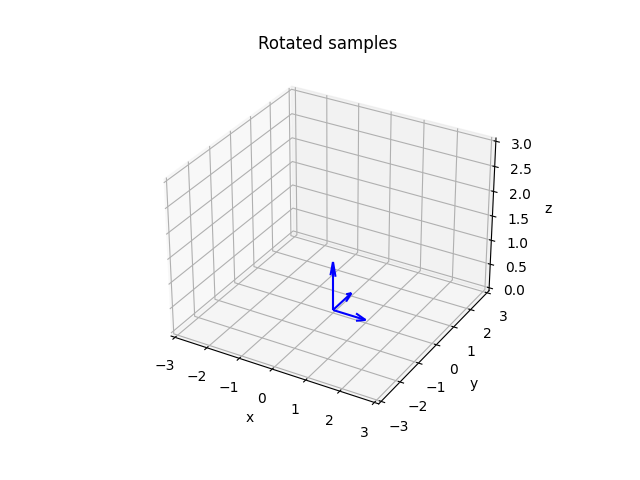

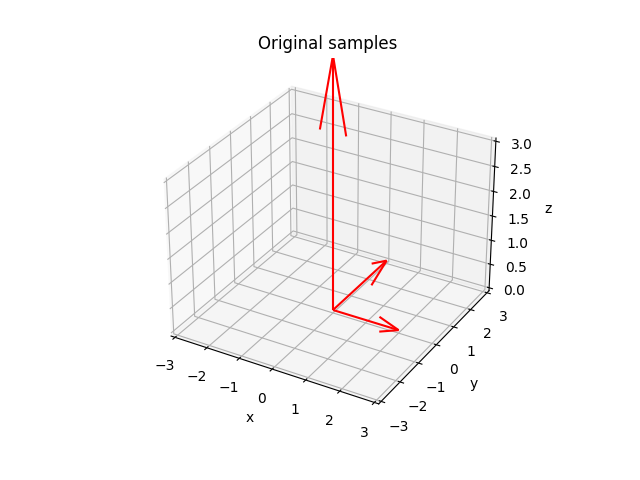

In [13]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.quiver(0, 0, 0, var[0], 0, 0, color='r')
ax1.quiver(0, 0, 0, 0, var[1], 0, color='r')
ax1.quiver(0, 0, 0, 0, 0, var[2], color='r')
ax1.set_title('Original samples')
# ax1.quiver(0, 0, 0, vec[0], vec[1], vec[2])
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([0, 3])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.quiver(0, 0, 0, R[0, 0], R[1, 0], R[2, 0], color='b')
ax2.quiver(0, 0, 0, R[0, 1], R[1, 1], R[2, 1], color='b')
ax2.quiver(0, 0, 0, R[0, 2], R[1, 2], R[2, 2], color='b')
ax2.set_title('Rotated samples')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([0, 3])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.show()

In [14]:
N = 100000
cov = R @ np.diag(var) @ R.T
samps1 = np.random.multivariate_normal(np.array((0.0, 0.0, 0.0), dtype=float), cov, size=N)
samps2a = np.random.multivariate_normal(np.array((0.0, 0.0, 0.0), dtype=float), np.diag(np.ones((3, ))), size=N)
samps2b = R.dot(np.diag(np.sqrt(var)).dot(samps2a.T))
print(f'Variance x: {samps1[:, 0].var()}, Original variance x: {samps2b[0, :].var()}')
print(f'Variance y: {samps1[:, 1].var()}, Original variance y: {samps2b[1, :].var()}')
print(f'Variance z: {samps1[:, 2].var()}, Original variance z: {samps2b[2, :].var()}')

Variance x: 2.010352100206177, Original variance x: 1.9872661856740472
Variance y: 2.9915761486050516, Original variance y: 2.9614446656730498
Variance z: 4.991851544799475, Original variance z: 4.973222675098009


(-6.0, 6.0)

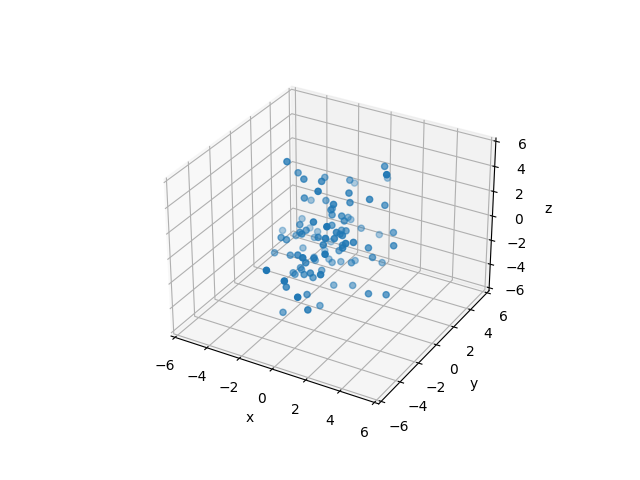

In [15]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')

ax3.scatter(samps1[:100, 0], samps1[:100, 1], samps1[:100, 2])
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_xlim([-6, 6])
ax3.set_ylim([-6, 6])
ax3.set_zlim([-6, 6])

In [16]:
import sympy as sy
theta, phi, varx, vary, varz = sy.symbols('theta, phi, varx, vary, varz')
mdiag = sy.Matrix([[varx, 0, 0], [0, vary, 0], [0, 0, varz]])
m1 = sy.Matrix([[sy.cos(theta), 0, sy.sin(theta)], [0, 1, 0], [-sy.sin(theta), 0, sy.cos(theta)]])
m2 = sy.Matrix([[sy.cos(phi), -sy.sin(phi), 0], [sy.sin(phi), sy.cos(phi), 0], [0, 0, 1]])
res = m2 * m1 * mdiag
print(res)

Matrix([[varx*cos(phi)*cos(theta), -vary*sin(phi), varz*sin(theta)*cos(phi)], [varx*sin(phi)*cos(theta), vary*cos(phi), varz*sin(phi)*sin(theta)], [-varx*sin(theta), 0, varz*cos(theta)]])
